# KAGGLE 

## Imports

In [1]:
import nltk
nltk.download('punkt')

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
# import keras
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model
# from jupyterthemes import jtplot
# jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 

[nltk_data] Downloading package punkt to /home/tl/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
main_df = pd.read_csv('train.csv')
main_df

id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiumnews.com   
3                                Jessica Purkiss   
4                                 Howard Portnoy   
...                                          ...   
20795                              Jerome Hudson   
20796                           Benjamin Hoffman   
20797  Michael J. de la Merced and Rachel Abrams   
20798                                Alex Ansary   
20799                              David Swanson   

                                                    text  label  
0      House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1      Ever get the feeling your life circles the rou...      0  
2      Why the Truth Might Get You Fired October 29, ...      1  
3      Videos 15 Civilians Killed In Single US Airstr...      1  
4      Print \nAn Iranian woman has been sentenced to...      1  
...                                                  ...    ...  
20795  Rapper T. I. unloaded on black celebrities who...      0  
20796  When the Green Bay Packers lost to the Washing...      0  
20797  The Macy’s of today grew from the union of sev...      0  
20798  NATO, Russia To Hold Parallel Exercises In Bal...      1  
20799    David Swanson is an author, activist, journa...      1  

[20800 rows x 5 columns]

In [3]:
main_df.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

## Pre-Processing data (columns)

In [4]:
main_df['original'] = main_df['title'] + " " + main_df['text']
main_df

id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiumnews.com   
3                                Jessica Purkiss   
4                                 Howard Portnoy   
...                                          ...   
20795                              Jerome Hudson   
20796                           Benjamin Hoffman   
20797  Michael J. de la Merced and Rachel Abrams   
20798                                Alex Ansary   
20799                              David Swanson   

                                                    text  label  \
0      House Dem Aide: We Didn’t Even See Comey’s Let...      1   
1      Ever get the feeling your life circles the rou...      0   
2      Why the Truth Might Get You Fired October 29, ...      1   
3      Videos 15 Civilians Killed In Single US Airstr...      1   
4      Print \nAn Iranian woman has been sentenced to...      1   
...                                                  ...    ...   
20795  Rapper T. I. unloaded on black celebrities who...      0   
20796  When the Green Bay Packers lost to the Washing...      0   
20797  The Macy’s of today grew from the union of sev...      0   
20798  NATO, Russia To Hold Parallel Exercises In Bal...      1   
20799    David Swanson is an author, activist, journa...      1   

                                                original  
0      House Dem Aide: We Didn’t Even See Comey’s Let...  
1      FLYNN: Hillary Clinton, Big Woman on Campus - ...  
2      Why the Truth Might Get You Fired Why the Trut...  
3      15 Civilians Killed In Single US Airstrike Hav...  
4      Iranian woman jailed for fictional unpublished...  
...                                                  ...  
20795  Rapper T.I.: Trump a ’Poster Child For White S...  
20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...  
20797  Macy’s Is Said to Receive Takeover Approach by...  
20798  NATO, Russia To Hold Parallel Exercises In Bal...  
20799  What Keeps the F-35 Alive   David Swanson is a...  

[20800 rows x 6 columns]

In [5]:
main_df.isnull().sum()

id             0
title        558
author      1957
text          39
label          0
original     597
dtype: int64

In [6]:
main_df = main_df.dropna()

In [7]:
main_df.isnull().sum()

id          0
title       0
author      0
text        0
label       0
original    0
dtype: int64

In [8]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/tl/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# stop_words.extend(['from','subject','re','edu','use'])

In [10]:
def remove_stopwords(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in stop_words and len(token) > 3 and token not in gensim.parsing.preprocessing.STOPWORDS:
            result.append(token)
    return result

In [11]:
main_df['words'] = main_df['original'].apply(remove_stopwords)

/home/tl/lnt/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
main_df

id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiumnews.com   
3                                Jessica Purkiss   
4                                 Howard Portnoy   
...                                          ...   
20795                              Jerome Hudson   
20796                           Benjamin Hoffman   
20797  Michael J. de la Merced and Rachel Abrams   
20798                                Alex Ansary   
20799                              David Swanson   

                                                    text  label  \
0      House Dem Aide: We Didn’t Even See Comey’s Let...      1   
1      Ever get the feeling your life circles the rou...      0   
2      Why the Truth Might Get You Fired October 29, ...      1   
3      Videos 15 Civilians Killed In Single US Airstr...      1   
4      Print \nAn Iranian woman has been sentenced to...      1   
...                                                  ...    ...   
20795  Rapper T. I. unloaded on black celebrities who...      0   
20796  When the Green Bay Packers lost to the Washing...      0   
20797  The Macy’s of today grew from the union of sev...      0   
20798  NATO, Russia To Hold Parallel Exercises In Bal...      1   
20799    David Swanson is an author, activist, journa...      1   

                                                original  \
0      House Dem Aide: We Didn’t Even See Comey’s Let...   
1      FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2      Why the Truth Might Get You Fired Why the Trut...   
3      15 Civilians Killed In Single US Airstrike Hav...   
4      Iranian woman jailed for fictional unpublished...   
...                                                  ...   
20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  What Keeps the F-35 Alive   David Swanson is a...   

                                                   words  
0      [house, aide, comey, letter, jason, chaffetz, ...  
1      [flynn, hillary, clinton, woman, campus, breit...  
2      [truth, fired, truth, fired, october, tension,...  
3      [civilians, killed, single, airstrike, identif...  
4      [iranian, woman, jailed, fictional, unpublishe...  
...                                                  ...  
20795  [rapper, trump, poster, child, white, supremac...  
20796  [playoffs, schedule, matchups, odds, york, tim...  
20797  [macy, said, receive, takeover, approach, huds...  
20798  [nato, russia, hold, parallel, exercises, balk...  
20799  [keeps, alive, david, swanson, author, activis...  

[18285 rows x 7 columns]

In [13]:
all_words = []
for li in main_df.words:
    for liw in li:
        all_words.append(liw)

In [14]:
all_words,len(all_words)

(['house',
  'aide',
  'comey',
  'letter',
  'jason',
  'chaffetz',
  'tweeted',
  'house',
  'aide',
  'comey',
  'letter',
  'jason',
  'chaffetz',
  'tweeted',
  'darrell',
  'lucus',
  'october',
  'subscribe',
  'jason',
  'chaffetz',
  'stump',
  'american',
  'fork',
  'utah',
  'image',
  'courtesy',
  'michael',
  'jolley',
  'available',
  'creative',
  'commons',
  'license',
  'apologies',
  'keith',
  'olbermann',
  'doubt',
  'worst',
  'person',
  'world',
  'week',
  'director',
  'james',
  'comey',
  'according',
  'house',
  'democratic',
  'aide',
  'looks',
  'like',
  'know',
  'second',
  'worst',
  'person',
  'turns',
  'comey',
  'sent',
  'infamous',
  'letter',
  'announcing',
  'looking',
  'emails',
  'related',
  'hillary',
  'clinton',
  'email',
  'server',
  'ranking',
  'democrats',
  'relevant',
  'committees',
  'hear',
  'comey',
  'tweet',
  'republican',
  'committee',
  'chairmen',
  'know',
  'comey',
  'notified',
  'republican',
  'chairmen'

In [15]:
main_df['sentense'] = main_df['words'].apply(lambda x: " ".join(x))
main_df

/home/tl/lnt/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiumnews.com   
3                                Jessica Purkiss   
4                                 Howard Portnoy   
...                                          ...   
20795                              Jerome Hudson   
20796                           Benjamin Hoffman   
20797  Michael J. de la Merced and Rachel Abrams   
20798                                Alex Ansary   
20799                              David Swanson   

                                                    text  label  \
0      House Dem Aide: We Didn’t Even See Comey’s Let...      1   
1      Ever get the feeling your life circles the rou...      0   
2      Why the Truth Might Get You Fired October 29, ...      1   
3      Videos 15 Civilians Killed In Single US Airstr...      1   
4      Print \nAn Iranian woman has been sentenced to...      1   
...                                                  ...    ...   
20795  Rapper T. I. unloaded on black celebrities who...      0   
20796  When the Green Bay Packers lost to the Washing...      0   
20797  The Macy’s of today grew from the union of sev...      0   
20798  NATO, Russia To Hold Parallel Exercises In Bal...      1   
20799    David Swanson is an author, activist, journa...      1   

                                                original  \
0      House Dem Aide: We Didn’t Even See Comey’s Let...   
1      FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2      Why the Truth Might Get You Fired Why the Trut...   
3      15 Civilians Killed In Single US Airstrike Hav...   
4      Iranian woman jailed for fictional unpublished...   
...                                                  ...   
20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  What Keeps the F-35 Alive   David Swanson is a...   

                                                   words  \
0      [house, aide, comey, letter, jason, chaffetz, ...   
1      [flynn, hillary, clinton, woman, campus, breit...   
2      [truth, fired, truth, fired, october, tension,...   
3      [civilians, killed, single, airstrike, identif...   
4      [iranian, woman, jailed, fictional, unpublishe...   
...                                                  ...   
20795  [rapper, trump, poster, child, white, supremac...   
20796  [playoffs, schedule, matchups, odds, york, tim...   
20797  [macy, said, receive, takeover, approach, huds...   
20798  [nato, russia, hold, parallel, exercises, balk...   
20799  [keeps, alive, david, swanson, author, activis...   

                                                sentense  
0      house aide comey letter jason chaffetz tweeted...  
1      flynn hillary clinton woman campus breitbart f...  
2      truth fired truth fired october tension intell...  
3      civilians killed single airstrike identified v...  
4      iranian woman jailed fictional 

## Visualization

/home/tl/lnt/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 127776 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/tl/lnt/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 127776 missing from current font.
  font.set_text(s, 0, flags=flags)


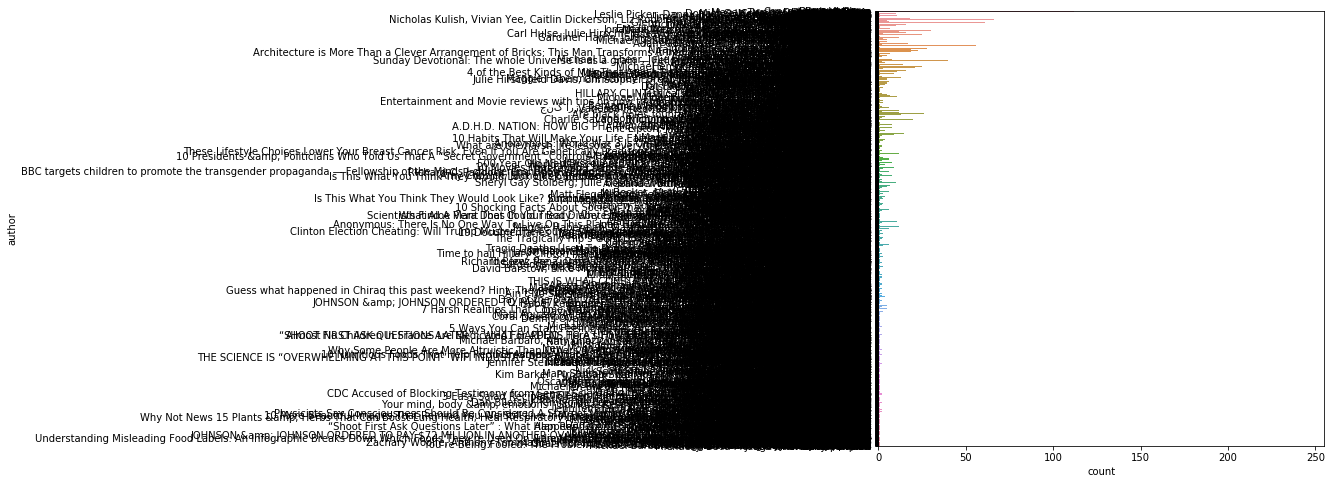

In [29]:
plt.figure(figsize = (8, 8))
sns.countplot(y = "author", data = main_df)

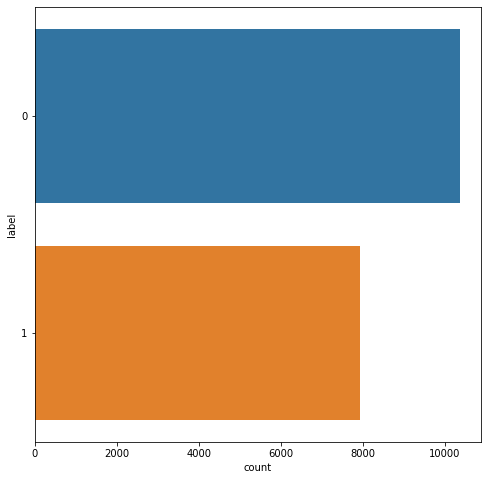

In [30]:
plt.figure(figsize = (8, 8))
sns.countplot(y = "label", data = main_df)

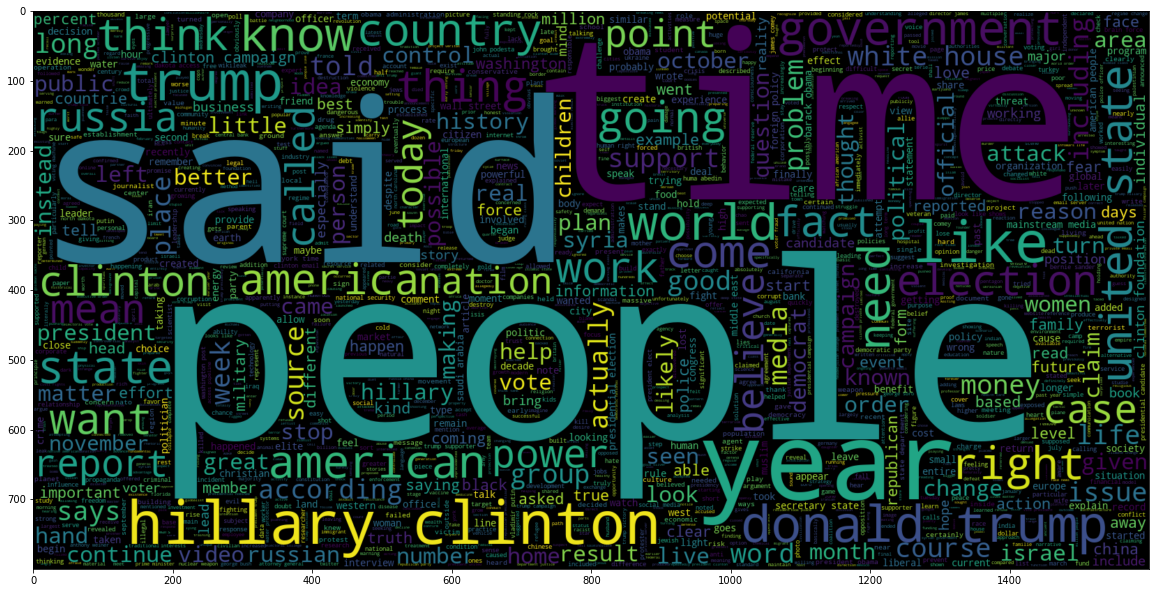

In [32]:
# plot the word cloud for text that is Real
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(main_df[main_df.label == 1].sentense))
plt.imshow(wc, interpolation = 'bilinear')

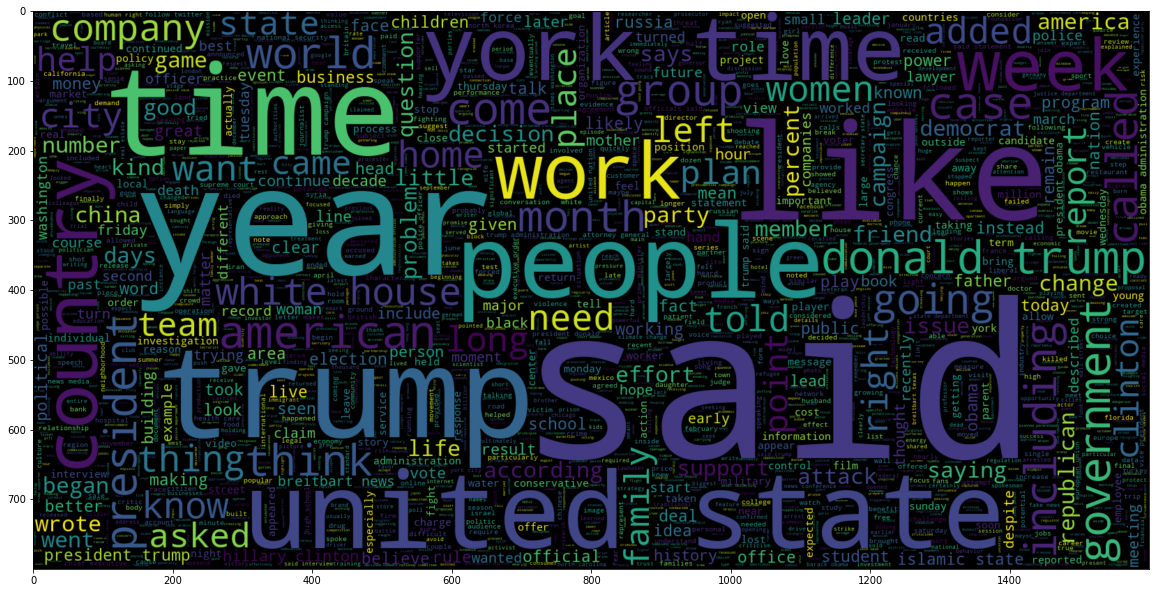

In [33]:
# plot the word cloud for text that is Not Real
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(main_df[main_df.label == 0].sentense))
plt.imshow(wc, interpolation = 'bilinear')

In [16]:
max_sentense_len = 0
for doc in main_df.sentense:
    tokens = nltk.word_tokenize(doc)
    if max_sentense_len < len(tokens):
        max_sentense_len = len(tokens)
    
max_sentense_len

13689

## TOKENIZER

Tokenizer allows us to vectorize text corpus by turning each text into a sequence of integers

In [45]:
# split data into test and train 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(main_df.sentense, main_df.label, test_size = 0.2)

In [55]:
# Create a tokenizer to tokenize the words and create sequences of tokenized words

total_words = len(list(set(all_words)))
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(x_train)
train_sequences = tokenizer.texts_to_sequences(x_train)
test_sequences = tokenizer.texts_to_sequences(x_test)
test_sequences

[[48926,
  569,
  75729,
  477,
  11239,
  16,
  12,
  11239,
  620,
  11239,
  477,
  2730,
  399,
  15,
  2916,
  45715,
  11072,
  4800,
  11421,
  951,
  275,
  48926,
  3771,
  2065,
  12821,
  477,
  12831,
  506,
  1512,
  4951,
  1744,
  413,
  125,
  75729,
  1945,
  1834,
  13050,
  75729,
  694,
  2269,
  2104,
  22604,
  28116,
  1955,
  2147,
  667,
  8047,
  1163,
  5621,
  396,
  7218,
  1,
  9496,
  6246,
  9199,
  1612,
  8490,
  2301,
  640,
  604,
  10057,
  63,
  14,
  219,
  976,
  15,
  1815,
  2407,
  1718,
  426,
  1998,
  7597,
  898,
  9548,
  8928,
  8490,
  624,
  4025,
  44355,
  30252,
  11413,
  1548,
  2147,
  15,
  3022,
  24189,
  6574,
  12835,
  1048,
  19215,
  95210,
  75308,
  64025,
  98173,
  13723,
  31,
  15158,
  2294,
  624,
  2118,
  6511,
  2064,
  18361,
  642,
  23336,
  7174,
  46861,
  818,
  9396,
  388,
  10968,
  48926,
  1834,
  10529,
  627,
  120,
  2087,
  1945,
  172,
  1670,
  1773,
  851,
  8679,
  125,
  27071,
  17751,
  58

In [20]:
print("The encoding for document\n",main_df.sentense[0],"\n is : ",train_sequences[0])

The encoding for document
 house aide comey letter jason chaffetz tweeted house aide comey letter jason chaffetz tweeted darrell lucus october subscribe jason chaffetz stump american fork utah image courtesy michael jolley available creative commons license apologies keith olbermann doubt worst person world week director james comey according house democratic aide looks like know second worst person turns comey sent infamous letter announcing looking emails related hillary clinton email server ranking democrats relevant committees hear comey tweet republican committee chairmen know comey notified republican chairmen democratic ranking members house intelligence judiciary oversight committees agency reviewing emails recently discovered order contained classified information long letter went oversight committee chairman jason chaffetz political world ablaze tweet informed learned existence emails appear pertinent investigation case reopened jason chaffetz jasoninthehouse october course k

In [21]:
# Add padding can either be maxlen = 4406 or smaller number maxlen = 40 seems to work well based on results
padded_train = pad_sequences(train_sequences,maxlen = 40, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences,maxlen = 40, truncating = 'post') 

In [22]:
for i,doc in enumerate(padded_train[:2]):
     print("The padded encoding for document",i+1," is : ",doc)

The padded encoding for document 1  is :  [ 2546  7184   229  4584  3019   426 10150  3807  4453  1402   146   212
  5789   997  2421  3648   938  2225   997 34531  6065  2765   411  3677
  3807   284   538 22166   124   229  2533   252     1  3648    11  4615
    73  1753  3245 22166]
The padded encoding for document 2  is :  [ 2903   177   391 17497 18290   982  4913  9772  1678   445   738  2204
  1800  1533 76414  3720   844  1501  1880   230     3    93 10252    89
 18291  4168   205  1572 12474 15190  3145 13342   844  1451   344  6180
 34532  3628   982  2375]


## LSTM Model 

In [23]:
# Sequential Model
model = Sequential()

# embeddidng layer
# model.add(Embedding(total_words, output_dim = 128))
model.add(Embedding(total_words, output_dim = 240))


# Bi-Directional RNN and LSTM
model.add(Bidirectional(LSTM(128)))

# Dense layers
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1,activation= 'sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 240)         35927760  
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               377856    
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 36,338,641
Trainable params: 36,338,641
Non-trainable params: 0
_________________________________________________________________


In [24]:
y_train = np.asarray(y_train)

In [25]:
# train the model
model.fit(padded_train, y_train, batch_size = 64, validation_split = 0.1, epochs = 2)

Train on 13165 samples, validate on 1463 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/2
13165/13165 [==============================] - 105s 8ms/sample - loss: 0.1903 - acc: 0.9186 - val_loss: 0.1310 - val_acc: 0.9528
Epoch 2/2
13165/13165 [==============================] - 100s 8ms/sample - loss: 0.0216 - acc: 0.9943 - val_loss: 0.1486 - val_acc: 0.9563


In [26]:
pred = model.predict(padded_test)
pred

array([[9.9949151e-01],
       [2.9236078e-05],
       [2.7924776e-05],
       ...,
       [7.6571107e-04],
       [9.5806348e-01],
       [9.9965215e-01]], dtype=float32)

In [27]:
# if the predicted value is >0.5 it is real else it is fake
prediction = []
for i in range(len(pred)):
    if pred[i].item() > 0.5:
        prediction.append(1)
    else:
        prediction.append(0)

In [28]:
# getting the accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(list(y_test), prediction)

print("Model Accuracy : ", accuracy)

Model Accuracy :  0.961717254580257


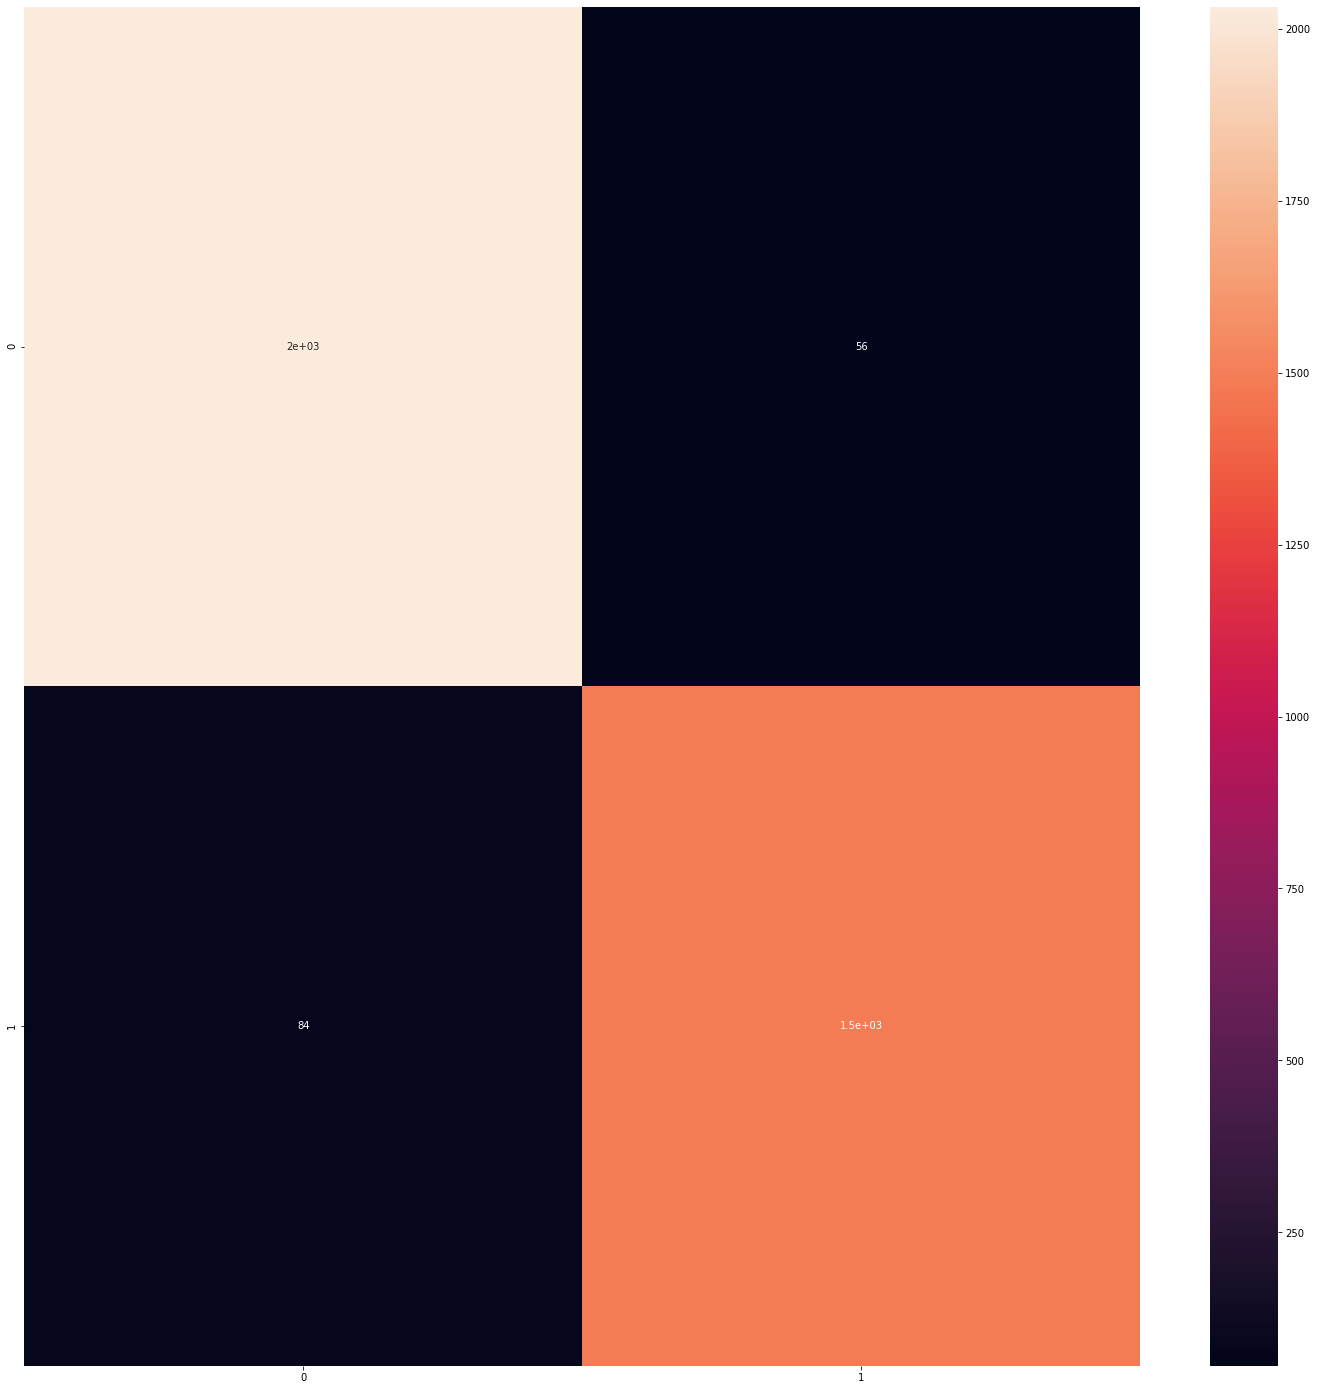

In [29]:
# get the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(list(y_test), prediction)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

In [82]:
test_df = pd.read_csv('test.csv')
test_df

id                                              title  \
0     20800  Specter of Trump Loosens Tongues, if Not Purse...   
1     20801  Russian warships ready to strike terrorists ne...   
2     20802  #NoDAPL: Native American Leaders Vow to Stay A...   
3     20803  Tim Tebow Will Attempt Another Comeback, This ...   
4     20804                    Keiser Report: Meme Wars (E995)   
...     ...                                                ...   
5195  25995  The Bangladeshi Traffic Jam That Never Ends - ...   
5196  25996  John Kasich Signs One Abortion Bill in Ohio bu...   
5197  25997  California Today: What, Exactly, Is in Your Su...   
5198  25998  300 US Marines To Be Deployed To Russian Borde...   
5199  25999  Awkward Sex, Onscreen and Off - The New York T...   

                       author  \
0            David Streitfeld   
1                         NaN   
2               Common Dreams   
3               Daniel Victor   
4     Truth Broadcast Network   
...                       ...   
5195               Jody Rosen   
5196      Sheryl Gay Stolberg   
5197             Mike McPhate   
5198                      NaN   
5199              Teddy Wayne   

                                                   text  
0     PALO ALTO, Calif.  —   After years of scorning...  
1     Russian warships ready to strike terrorists ne...  
2     Videos #NoDAPL: Native American Leaders Vow to...  
3     If at first you don’t succeed, try a different...  
4     42 mins ago 1 Views 0 Comments 0 Likes 'For th...  
...                                                 ...  
5195  Of all the dysfunctions that plague the world’...  
5196  WASHINGTON  —   Gov. John Kasich of Ohio on Tu...  
5197  Good morning. (Want to get California Today by...  
5198  « Previous - Next » 300 US Marines To Be Deplo...  
5199  Perhaps you’ve seen the new TV series whose pi...  

[5200 rows x 4 columns]

In [83]:
test_df['original'] = test_df['title'] + " " + test_df['text']
test_df

id                                              title  \
0     20800  Specter of Trump Loosens Tongues, if Not Purse...   
1     20801  Russian warships ready to strike terrorists ne...   
2     20802  #NoDAPL: Native American Leaders Vow to Stay A...   
3     20803  Tim Tebow Will Attempt Another Comeback, This ...   
4     20804                    Keiser Report: Meme Wars (E995)   
...     ...                                                ...   
5195  25995  The Bangladeshi Traffic Jam That Never Ends - ...   
5196  25996  John Kasich Signs One Abortion Bill in Ohio bu...   
5197  25997  California Today: What, Exactly, Is in Your Su...   
5198  25998  300 US Marines To Be Deployed To Russian Borde...   
5199  25999  Awkward Sex, Onscreen and Off - The New York T...   

                       author  \
0            David Streitfeld   
1                         NaN   
2               Common Dreams   
3               Daniel Victor   
4     Truth Broadcast Network   
...                       ...   
5195               Jody Rosen   
5196      Sheryl Gay Stolberg   
5197             Mike McPhate   
5198                      NaN   
5199              Teddy Wayne   

                                                   text  \
0     PALO ALTO, Calif.  —   After years of scorning...   
1     Russian warships ready to strike terrorists ne...   
2     Videos #NoDAPL: Native American Leaders Vow to...   
3     If at first you don’t succeed, try a different...   
4     42 mins ago 1 Views 0 Comments 0 Likes 'For th...   
...                                                 ...   
5195  Of all the dysfunctions that plague the world’...   
5196  WASHINGTON  —   Gov. John Kasich of Ohio on Tu...   
5197  Good morning. (Want to get California Today by...   
5198  « Previous - Next » 300 US Marines To Be Deplo...   
5199  Perhaps you’ve seen the new TV series whose pi...   

                                               original  
0     Specter of Trump Loosens Tongues, if Not Purse...  
1     Russian warships ready to strike terrorists ne...  
2     #NoDAPL: Native American Leaders Vow to Stay A...  
3     Tim Tebow Will Attempt Another Comeback, This ...  
4     Keiser Report: Meme Wars (E995) 42 mins ago 1 ...  
...                                                 ...  
5195  The Bangladeshi Traffic Jam That Never Ends - ...  
5196  John Kasich Signs One Abortion Bill in Ohio bu...  
5197  California Today: What, Exactly, Is in Your Su...  
5198  300 US Marines To Be Deployed To Russian Borde...  
5199  Awkward Sex, Onscreen and Off - The New York T...  

[5200 rows x 5 columns]

In [84]:
test_df.isnull().sum()

id            0
title       122
author      503
text          7
original    129
dtype: int64

In [85]:
test_df = test_df.dropna()

In [86]:
test_df.isnull().sum()

id          0
title       0
author      0
text        0
original    0
dtype: int64

In [87]:
test_df['words'] = test_df['original'].apply(remove_stopwords)

/home/tl/lnt/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [88]:
test_df

id                                              title  \
0     20800  Specter of Trump Loosens Tongues, if Not Purse...   
2     20802  #NoDAPL: Native American Leaders Vow to Stay A...   
3     20803  Tim Tebow Will Attempt Another Comeback, This ...   
4     20804                    Keiser Report: Meme Wars (E995)   
6     20806  Pelosi Calls for FBI Investigation to Find Out...   
...     ...                                                ...   
5194  25994  Trump on If ’Tapes’ Exist of Comey Conversatio...   
5195  25995  The Bangladeshi Traffic Jam That Never Ends - ...   
5196  25996  John Kasich Signs One Abortion Bill in Ohio bu...   
5197  25997  California Today: What, Exactly, Is in Your Su...   
5199  25999  Awkward Sex, Onscreen and Off - The New York T...   

                       author  \
0            David Streitfeld   
2               Common Dreams   
3               Daniel Victor   
4     Truth Broadcast Network   
6                     Pam Key   
...                       ...   
5194                  Pam Key   
5195               Jody Rosen   
5196      Sheryl Gay Stolberg   
5197             Mike McPhate   
5199              Teddy Wayne   

                                                   text  \
0     PALO ALTO, Calif.  —   After years of scorning...   
2     Videos #NoDAPL: Native American Leaders Vow to...   
3     If at first you don’t succeed, try a different...   
4     42 mins ago 1 Views 0 Comments 0 Likes 'For th...   
6     Sunday on NBC’s “Meet the Press,” House Minori...   
...                                                 ...   
5194  Pres. Trump on if “tapes” exist of his convers...   
5195  Of all the dysfunctions that plague the world’...   
5196  WASHINGTON  —   Gov. John Kasich of Ohio on Tu...   
5197  Good morning. (Want to get California Today by...   
5199  Perhaps you’ve seen the new TV series whose pi...   

                                               original  \
0     Specter of Trump Loosens Tongues, if Not Purse...   
2     #NoDAPL: Native American Leaders Vow to Stay A...   
3     Tim Tebow Will Attempt Another Comeback, This ...   
4     Keiser Report: Meme Wars (E995) 42 mins ago 1 ...   
6     Pelosi Calls for FBI Investigation to Find Out...   
...                                                 ...   
5194  Trump on If ’Tapes’ Exist of Comey Conversatio...   
5195  The Bangladeshi Traffic Jam That Never Ends - ...   
5196  John Kasich Signs One Abortion Bill in Ohio bu...   
5197  California Today: What, Exactly, Is in Your Su...   
5199  Awkward Sex, Onscreen and Off - The New York T...   

                                                  words  
0     [specter, trump, loosens, tongues, purse, stri...  
2     [nodapl, native, american, leaders, stay, wint...  
3     [tebow, attempt, comeback, time, baseball, yor...  
4     [keiser, report, meme, wars, mins, views, comm...  
6     [pelosi, calls, investigation, russians, donal...  
...                                                 ...  
5194  [trump, tapes, exist, comey, conversation, tel...  
5195  [bangladeshi, traffic, ends, york, times, dysf...  
5196  [john, kasich, signs, abortion, ohio, vetoes, ...  
5197  [california, today, exactly, sushi, york, time...  
5199  [awkward, onscreen, york, times, seen, series,...  

[4575 rows x 6 columns]

In [89]:
test_df['sentense'] = test_df['words'].apply(lambda x: " ".join(x))
test_df

/home/tl/lnt/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


id                                              title  \
0     20800  Specter of Trump Loosens Tongues, if Not Purse...   
2     20802  #NoDAPL: Native American Leaders Vow to Stay A...   
3     20803  Tim Tebow Will Attempt Another Comeback, This ...   
4     20804                    Keiser Report: Meme Wars (E995)   
6     20806  Pelosi Calls for FBI Investigation to Find Out...   
...     ...                                                ...   
5194  25994  Trump on If ’Tapes’ Exist of Comey Conversatio...   
5195  25995  The Bangladeshi Traffic Jam That Never Ends - ...   
5196  25996  John Kasich Signs One Abortion Bill in Ohio bu...   
5197  25997  California Today: What, Exactly, Is in Your Su...   
5199  25999  Awkward Sex, Onscreen and Off - The New York T...   

                       author  \
0            David Streitfeld   
2               Common Dreams   
3               Daniel Victor   
4     Truth Broadcast Network   
6                     Pam Key   
...                       ...   
5194                  Pam Key   
5195               Jody Rosen   
5196      Sheryl Gay Stolberg   
5197             Mike McPhate   
5199              Teddy Wayne   

                                                   text  \
0     PALO ALTO, Calif.  —   After years of scorning...   
2     Videos #NoDAPL: Native American Leaders Vow to...   
3     If at first you don’t succeed, try a different...   
4     42 mins ago 1 Views 0 Comments 0 Likes 'For th...   
6     Sunday on NBC’s “Meet the Press,” House Minori...   
...                                                 ...   
5194  Pres. Trump on if “tapes” exist of his convers...   
5195  Of all the dysfunctions that plague the world’...   
5196  WASHINGTON  —   Gov. John Kasich of Ohio on Tu...   
5197  Good morning. (Want to get California Today by...   
5199  Perhaps you’ve seen the new TV series whose pi...   

                                               original  \
0     Specter of Trump Loosens Tongues, if Not Purse...   
2     #NoDAPL: Native American Leaders Vow to Stay A...   
3     Tim Tebow Will Attempt Another Comeback, This ...   
4     Keiser Report: Meme Wars (E995) 42 mins ago 1 ...   
6     Pelosi Calls for FBI Investigation to Find Out...   
...                                                 ...   
5194  Trump on If ’Tapes’ Exist of Comey Conversatio...   
5195  The Bangladeshi Traffic Jam That Never Ends - ...   
5196  John Kasich Signs One Abortion Bill in Ohio bu...   
5197  California Today: What, Exactly, Is in Your Su...   
5199  Awkward Sex, Onscreen and Off - The New York T...   

                                                  words  \
0     [specter, trump, loosens, tongues, purse, stri...   
2     [nodapl, native, american, leaders, stay, wint...   
3     [tebow, attempt, comeback, time, baseball, yor...   
4     [keiser, report, meme, wars, mins, views, comm...   
6     [pelosi, calls, investigation, russians, donal...   
...                                                 ...   
5194  [trump, tapes, exist, comey, conversation, tel...   
5195  [bangladeshi, traffic, ends, york, times, dysf...   
5196  [john, kasich, signs, abortion, ohio, vetoes, ...   
5197  [california, today, exactly, sushi, york, time...   
5199  [awkward, onscreen, york, times, seen, series,...   

                                               sentense  
0     specter trump loosens tongues purse strings si...  
2     nodapl native american leaders stay winter fil...  
3     tebow attempt comeback time baseball york time...  
4     keiser report meme wars mins views comments li...  
6     pelosi calls investigation russians donald tru...  
...                                                 ...  
5194  trump tapes exist comey conversation tell mayb...  
5195  bangladeshi traffic ends york times dysfunctio...  
5196  john kasich signs abortion ohio vetoes restric...  
5197  california today exactly sushi york times good...  
5199  awkward onscreen york times seen series pilot ..

In [90]:
# Create a tokenizer to tokenize the words and create sequences of tokenized words
test_sentense = test_df.sentense
test_all_words = []
for li in test_df.words:
    for liw in li:
        test_all_words.append(liw)
words_len = len(list(set(test_all_words)))

tokenizer = Tokenizer(num_words=words_len)
tokenizer.fit_on_texts(test_sentense)
check_sequences = tokenizer.texts_to_sequences(test_sentense)

# for signal sentense
# test_sentense = test_df.sentense[0]
# test_all_words = []
# for liw in test_df.words[0]:
#     test_all_words.append(liw)
# words_len = len(list(set(test_all_words)))

# tokenizer = Tokenizer(num_words=words_len)
# tokenizer.fit_on_texts(test_sentense)
# check_sequences = tokenizer.texts_to_sequences(test_sentense)
# test_sentense,check_sequences,words_len

In [91]:
padded_check_test = pad_sequences(check_sequences,maxlen = 40, truncating = 'post')
padded_check_test

array([[ 9491,     2, 29061, ...,   564,   640, 12404],
       [11170,  1171,    16, ...,  2252,   512,   693],
       [11533,   762,  6088, ..., 11171, 44791,  2232],
       ...,
       [  157,  4034,  1158, ...,  3382,  4034,     1],
       [  270,    91,   817, ..., 13770,   354,  2216],
       [ 5108, 11966,    18, ...,  4791, 12366,   241]], dtype=int32)

In [92]:
test_pred = model.predict(padded_check_test)
test_pred

array([[0.03803098],
       [0.50488776],
       [0.01415315],
       ...,
       [0.06501417],
       [0.00373888],
       [0.6530933 ]], dtype=float32)

In [93]:
# if the predicted value is >0.5 it is real else it is fake
prediction = []
for i in range(len(pred)):
    if pred[i].item() > 0.5:
        prediction.append(1)
    else:
        prediction.append(0)
prediction

[1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,


In [96]:
len(prediction)

3657

In [94]:
submit_df = pd.read_csv('submit.csv')
submit_df

id  label
0     20800      0
1     20801      1
2     20802      0
3     20803      1
4     20804      1
...     ...    ...
5195  25995      0
5196  25996      1
5197  25997      0
5198  25998      1
5199  25999      0

[5200 rows x 2 columns]

In [79]:
submit_id = list(submit_df.id)
test_id = list(test_df.id)
submit_df['pred'] = 0
for ids in test_id:
    if ids in submit_id:
        submit_df['pred'][]

0       20800
2       20802
3       20803
4       20804
6       20806
        ...  
5194    25994
5195    25995
5196    25996
5197    25997
5199    25999
Name: id, Length: 4575, dtype: int64

In [95]:
test_df['pred'] = prediction

ValueError: Length of values does not match length of index

In [80]:
dfinal = submit_df.merge(test_df, on="id", how = 'inner')
dfinal

id  label                                              title  \
0     20800      0  Specter of Trump Loosens Tongues, if Not Purse...   
1     20802      0  #NoDAPL: Native American Leaders Vow to Stay A...   
2     20803      1  Tim Tebow Will Attempt Another Comeback, This ...   
3     20804      1                    Keiser Report: Meme Wars (E995)   
4     20806      1  Pelosi Calls for FBI Investigation to Find Out...   
...     ...    ...                                                ...   
4570  25994      1  Trump on If ’Tapes’ Exist of Comey Conversatio...   
4571  25995      0  The Bangladeshi Traffic Jam That Never Ends - ...   
4572  25996      1  John Kasich Signs One Abortion Bill in Ohio bu...   
4573  25997      0  California Today: What, Exactly, Is in Your Su...   
4574  25999      0  Awkward Sex, Onscreen and Off - The New York T...   

                       author  \
0            David Streitfeld   
1               Common Dreams   
2               Daniel Victor   
3     Truth Broadcast Network   
4                     Pam Key   
...                       ...   
4570                  Pam Key   
4571               Jody Rosen   
4572      Sheryl Gay Stolberg   
4573             Mike McPhate   
4574              Teddy Wayne   

                                                   text  \
0     PALO ALTO, Calif.  —   After years of scorning...   
1     Videos #NoDAPL: Native American Leaders Vow to...   
2     If at first you don’t succeed, try a different...   
3     42 mins ago 1 Views 0 Comments 0 Likes 'For th...   
4     Sunday on NBC’s “Meet the Press,” House Minori...   
...                                                 ...   
4570  Pres. Trump on if “tapes” exist of his convers...   
4571  Of all the dysfunctions that plague the world’...   
4572  WASHINGTON  —   Gov. John Kasich of Ohio on Tu...   
4573  Good morning. (Want to get California Today by...   
4574  Perhaps you’ve seen the new TV series whose pi...   

                                               original  \
0     Specter of Trump Loosens Tongues, if Not Purse...   
1     #NoDAPL: Native American Leaders Vow to Stay A...   
2     Tim Tebow Will Attempt Another Comeback, This ...   
3     Keiser Report: Meme Wars (E995) 42 mins ago 1 ...   
4     Pelosi Calls for FBI Investigation to Find Out...   
...                                                 ...   
4570  Trump on If ’Tapes’ Exist of Comey Conversatio...   
4571  The Bangladeshi Traffic Jam That Never Ends - ...   
4572  John Kasich Signs One Abortion Bill in Ohio bu...   
4573  California Today: What, Exactly, Is in Your Su...   
4574  Awkward Sex, Onscreen and Off - The New York T...   

                                                  words  \
0     [specter, trump, loosens, tongues, purse, stri...   
1     [nodapl, native, american, leaders, stay, wint...   
2     [tebow, attempt, comeback, time, baseball, yor...   
3     [keiser, report, meme, wars, mins, views, comm...   
4     [pelosi, calls, investigation, russians, donal...   
...                                                 ...   
4570  [trump, tapes, exist, comey, conversation, tel...   
4571  [bangladeshi, traffic, ends, york, times, dysf...   
4572  [john, kasich, signs, abortion, ohio, vetoes, ...   
4573  [california, today, exactly, sushi, york, time...   
4574  [awkward, onscreen, york, times, seen, series,...   

                                               sentense  
0     specter trump loosens tongues purse strings si...  
1     nodapl native american leaders stay winter fil...  
2     tebow attempt comeback time baseball york time...  
3     keiser report meme wars mins views comments li...  
4     pelosi calls investigation russians donald tru...  
...                                                 ...  
4570  trump tapes exist comey conversation tell mayb...  
4571  bangladeshi traffic ends york times dysfunctio...  
4572  john kasich signs abortion ohio vetoes restric...  
4573  california today exact

In [62]:
org_val = submit_df.label
accuracy = accuracy_score(list(org_val), prediction)
accuracy

ValueError: Found input variables with inconsistent numbers of samples: [5200, 3657]